In [3]:
from typing import Dict, Optional
import os
import dotenv

import mdtraj as md
import numpy as np
import pyemma
import scipy.spatial
import matplotlib.pyplot as plt
import lovelyplots
plt.style.use('ipynb')

from jamun.metrics._ramachandran import compute_JS_divergence_of_ramachandran, num_dihedrals
from jamun.utils import convert_to_three_letter_code

from utils import get_JAMUN_trajectories, get_OpenMM_trajectories, get_Timewarp_trajectories, get_featurized_trajectory

In [4]:
JAMUN_DATA_PATH = os.environ.get("JAMUN_DATA_PATH", dotenv.get_key("../.env", "JAMUN_DATA_PATH"))
JAMUN_DATA_PATH

'/data/bucket/kleinhej/'

Weights and Biases run paths for the sampling runs!

In [5]:
wandb_sample_run_paths = [
    "prescient-design/jamun/4rnu5lxp"
]

In [6]:
JAMUN_trajs = get_JAMUN_trajectories(wandb_sample_run_paths)
peptides = ["AC", "AD"]
JAMUN_trajs = {peptide: JAMUN_trajs[peptide] for peptide in peptides}
JAMUN_trajs

True


{'AC': <mdtraj.Trajectory with 50000 frames, 12 atoms, 2 residues, without unitcells at 0x7f1697b49810>,
 'AD': <mdtraj.Trajectory with 50000 frames, 14 atoms, 2 residues, without unitcells at 0x7f1697b48e80>}

In [7]:
Timewarp_trajs = get_Timewarp_trajectories(JAMUN_DATA_PATH, peptide_type="2AA", filter_codes=list(JAMUN_trajs.keys()))
Timewarp_trajs

100%|██████████| 2/2 [00:27<00:00, 13.93s/it]


{'AC': <mdtraj.Trajectory with 550000 frames, 12 atoms, 2 residues, without unitcells at 0x7f1697b3e8f0>,
 'AD': <mdtraj.Trajectory with 550001 frames, 14 atoms, 2 residues, without unitcells at 0x7f1697c0e9e0>}

In [8]:
OpenMM_trajs = get_OpenMM_trajectories(JAMUN_DATA_PATH, filter_codes=list(JAMUN_trajs.keys()))
OpenMM_trajs

100%|██████████| 2/2 [00:21<00:00, 10.75s/it]


{'AD': <mdtraj.Trajectory with 1400000 frames, 18 atoms, 4 residues, and unitcells at 0x7f1697b86e30>,
 'AC': <mdtraj.Trajectory with 1400000 frames, 16 atoms, 4 residues, and unitcells at 0x7f1697b84a00>}

In [9]:
# dir = "/data/bucket/kleinhej//capped_diamines/timewarp_splits/test/"
# for filename in os.listdir(dir):
#     peptide = filename.split(".")[0]
#     traj = md.load_xtc(f"{dir}/{peptide}.xtc", top=f"{dir}/{peptide}.pdb")
#     print(peptide, traj.n_frames, "frames")
#     del traj


In [10]:
# TBG_trajs = get_TBG_trajectories("tbg_samples")

/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())
/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())
/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support

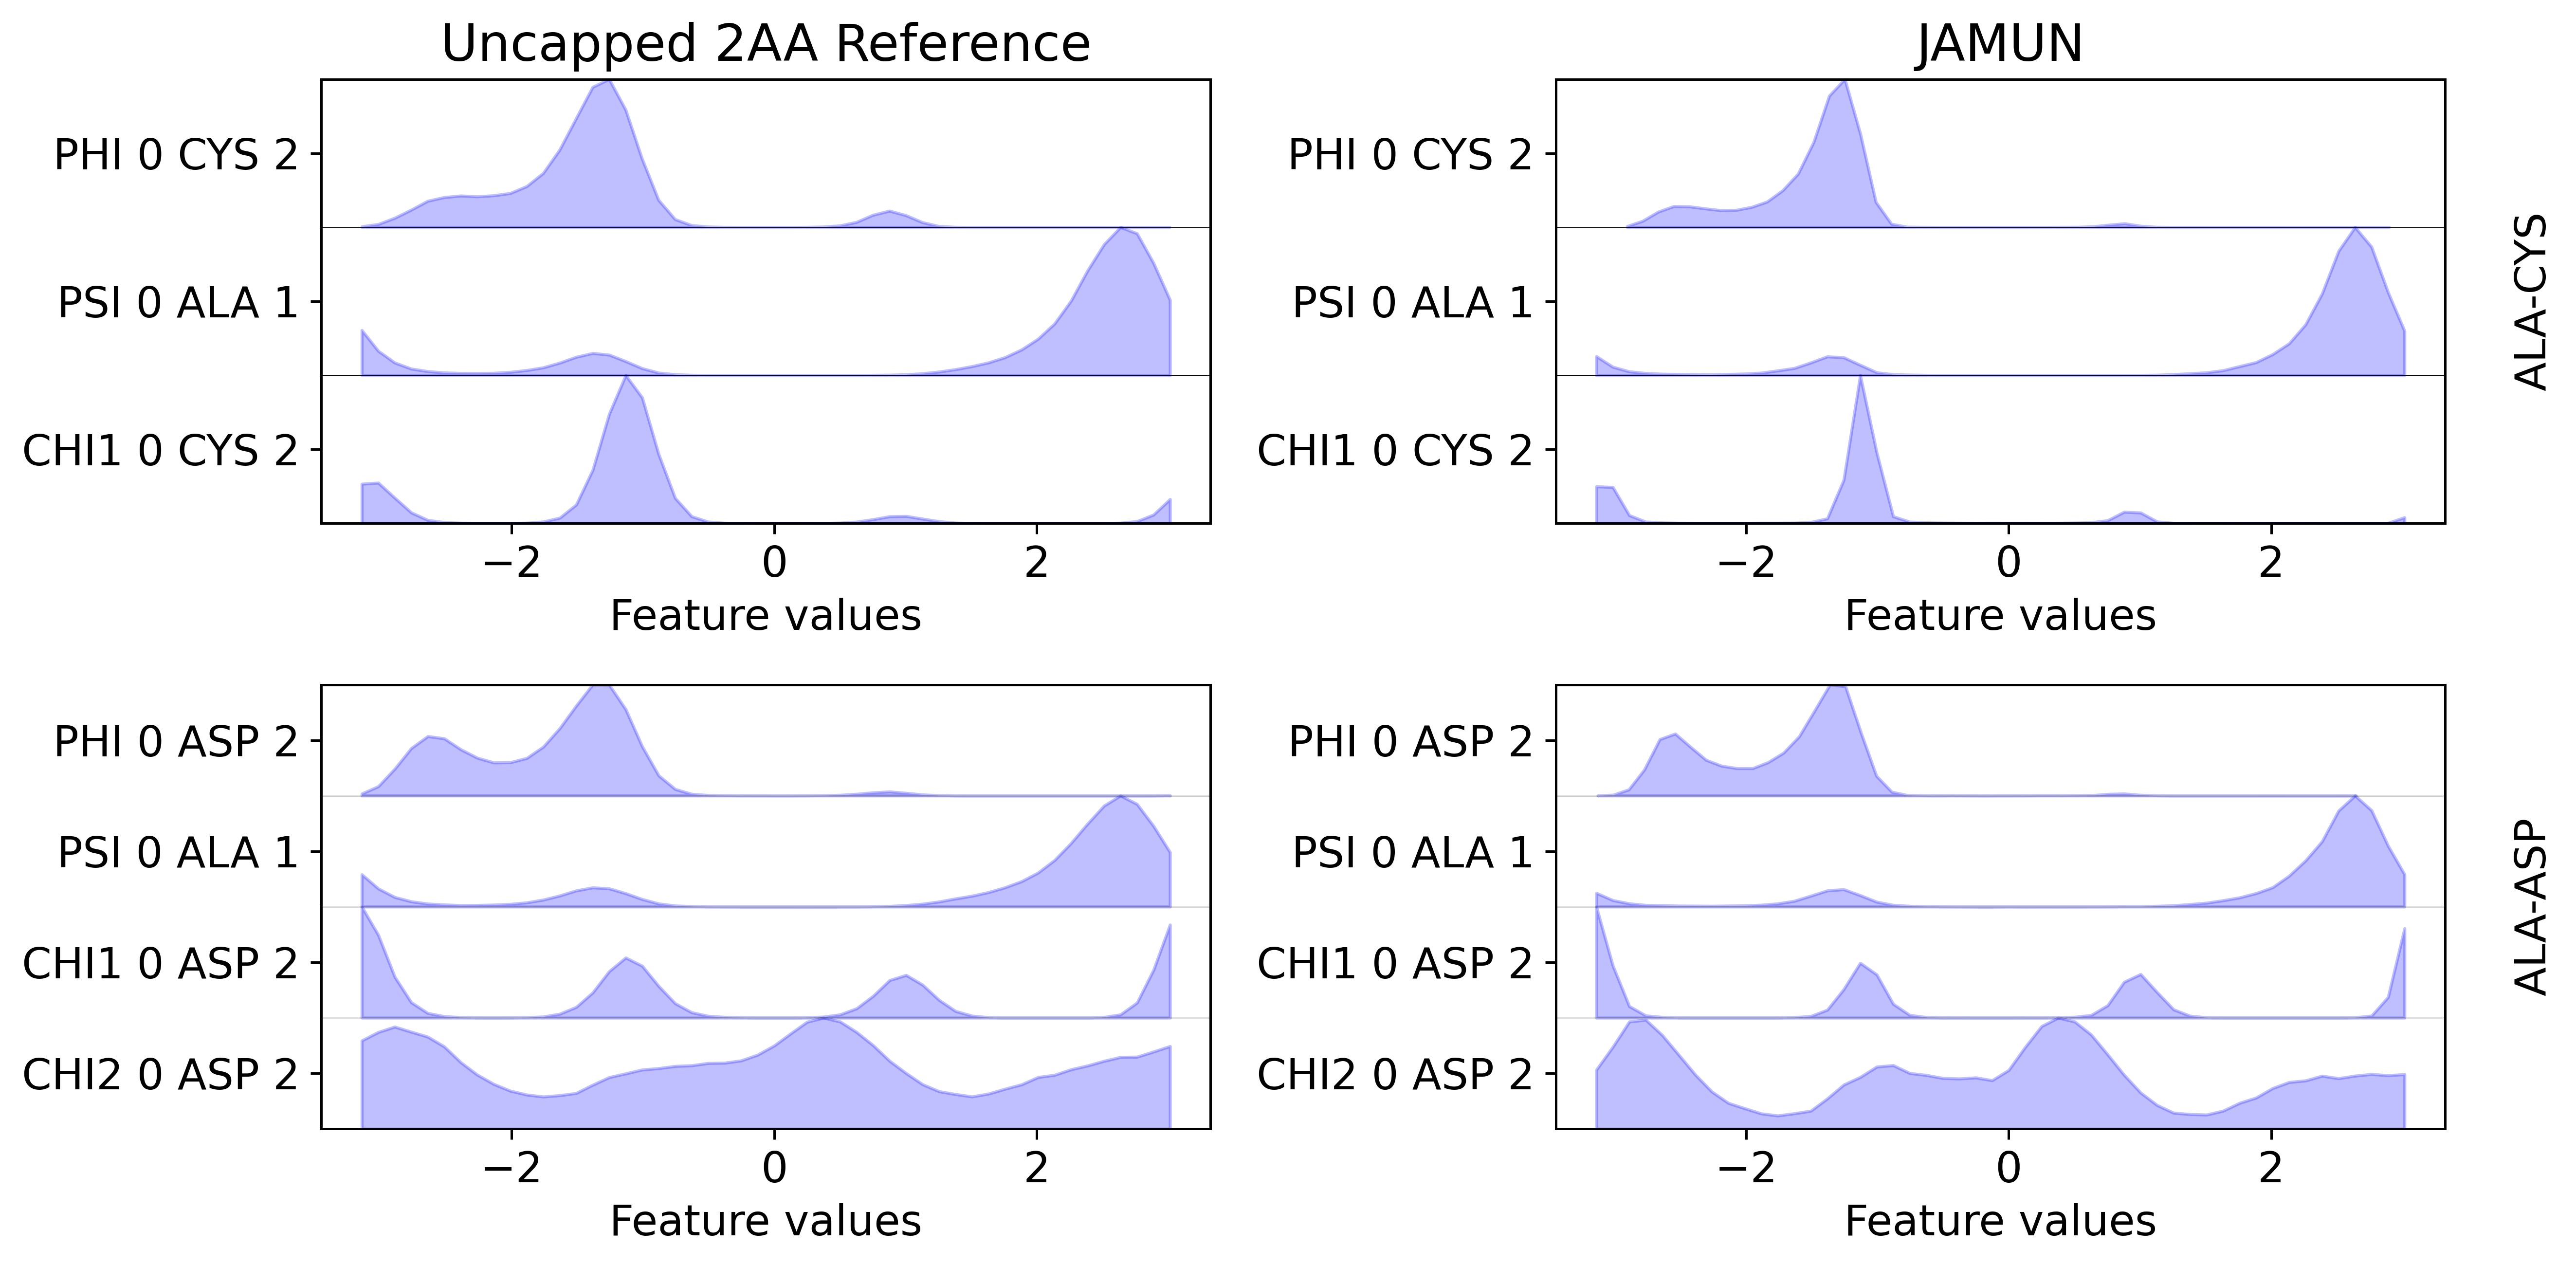

In [11]:
fig, axs = plt.subplots(nrows=len(JAMUN_trajs), ncols=2, figsize=(12, 6), squeeze=False)
for i, peptide in enumerate(JAMUN_trajs):

    Timewarp_feat, Timewarp_featurized_traj = get_featurized_trajectory(Timewarp_trajs[peptide])
    pyemma.plots.plot_feature_histograms(Timewarp_featurized_traj, feature_labels=Timewarp_feat.describe(), ax=axs[i, 0])

    JAMUN_feat, JAMUN_featurized_traj = get_featurized_trajectory(JAMUN_trajs[peptide])
    pyemma.plots.plot_feature_histograms(JAMUN_featurized_traj, feature_labels=JAMUN_feat.describe(), ax=axs[i, 1])

    peptide_3letter = "-".join([convert_to_three_letter_code(aa) for aa in peptide])
    axs[i, -1].text(1.1, 0.5, peptide_3letter, rotation=90, verticalalignment='center', horizontalalignment='center', transform=axs[i, -1].transAxes)

axs[0, 0].set_title("Uncapped 2AA Reference")
axs[0, 1].set_title("JAMUN")
plt.tight_layout()

In [12]:
for i, peptide in enumerate(JAMUN_trajs):
    Timewarp_feat, Timewarp_featurized_traj = get_featurized_trajectory(Timewarp_trajs[peptide])
    JAMUN_feat, JAMUN_featurized_traj = get_featurized_trajectory(JAMUN_trajs[peptide])

    print("peptide", peptide)
    for j, feat in enumerate(Timewarp_feat.describe()):
        Timewarp_p = np.histogram(Timewarp_featurized_traj[:,j], range=(-np.pi, np.pi), bins=100)[0]
        JAMUN_p = np.histogram(JAMUN_featurized_traj[:,j], range=(-np.pi, np.pi), bins=100)[0]
        print(feat, "JSD:", scipy.spatial.distance.jensenshannon(Timewarp_p, JAMUN_p))


/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


peptide AC
PHI 0 CYS 2 JSD: 0.16688982987161094
PSI 0 ALA 1 JSD: 0.10582402359760333
CHI1 0 CYS 2 JSD: 0.28599100897458507
peptide AD
PHI 0 ASP 2 JSD: 0.13261575803562037
PSI 0 ALA 1 JSD: 0.10740113254355267
CHI1 0 ASP 2 JSD: 0.1803929627576135
CHI2 0 ASP 2 JSD: 0.0813167816471294


/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())
/homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /homefs/home/daigavaa/miniforge3/envs/jamun-extras/lib/python3.10/site-packages

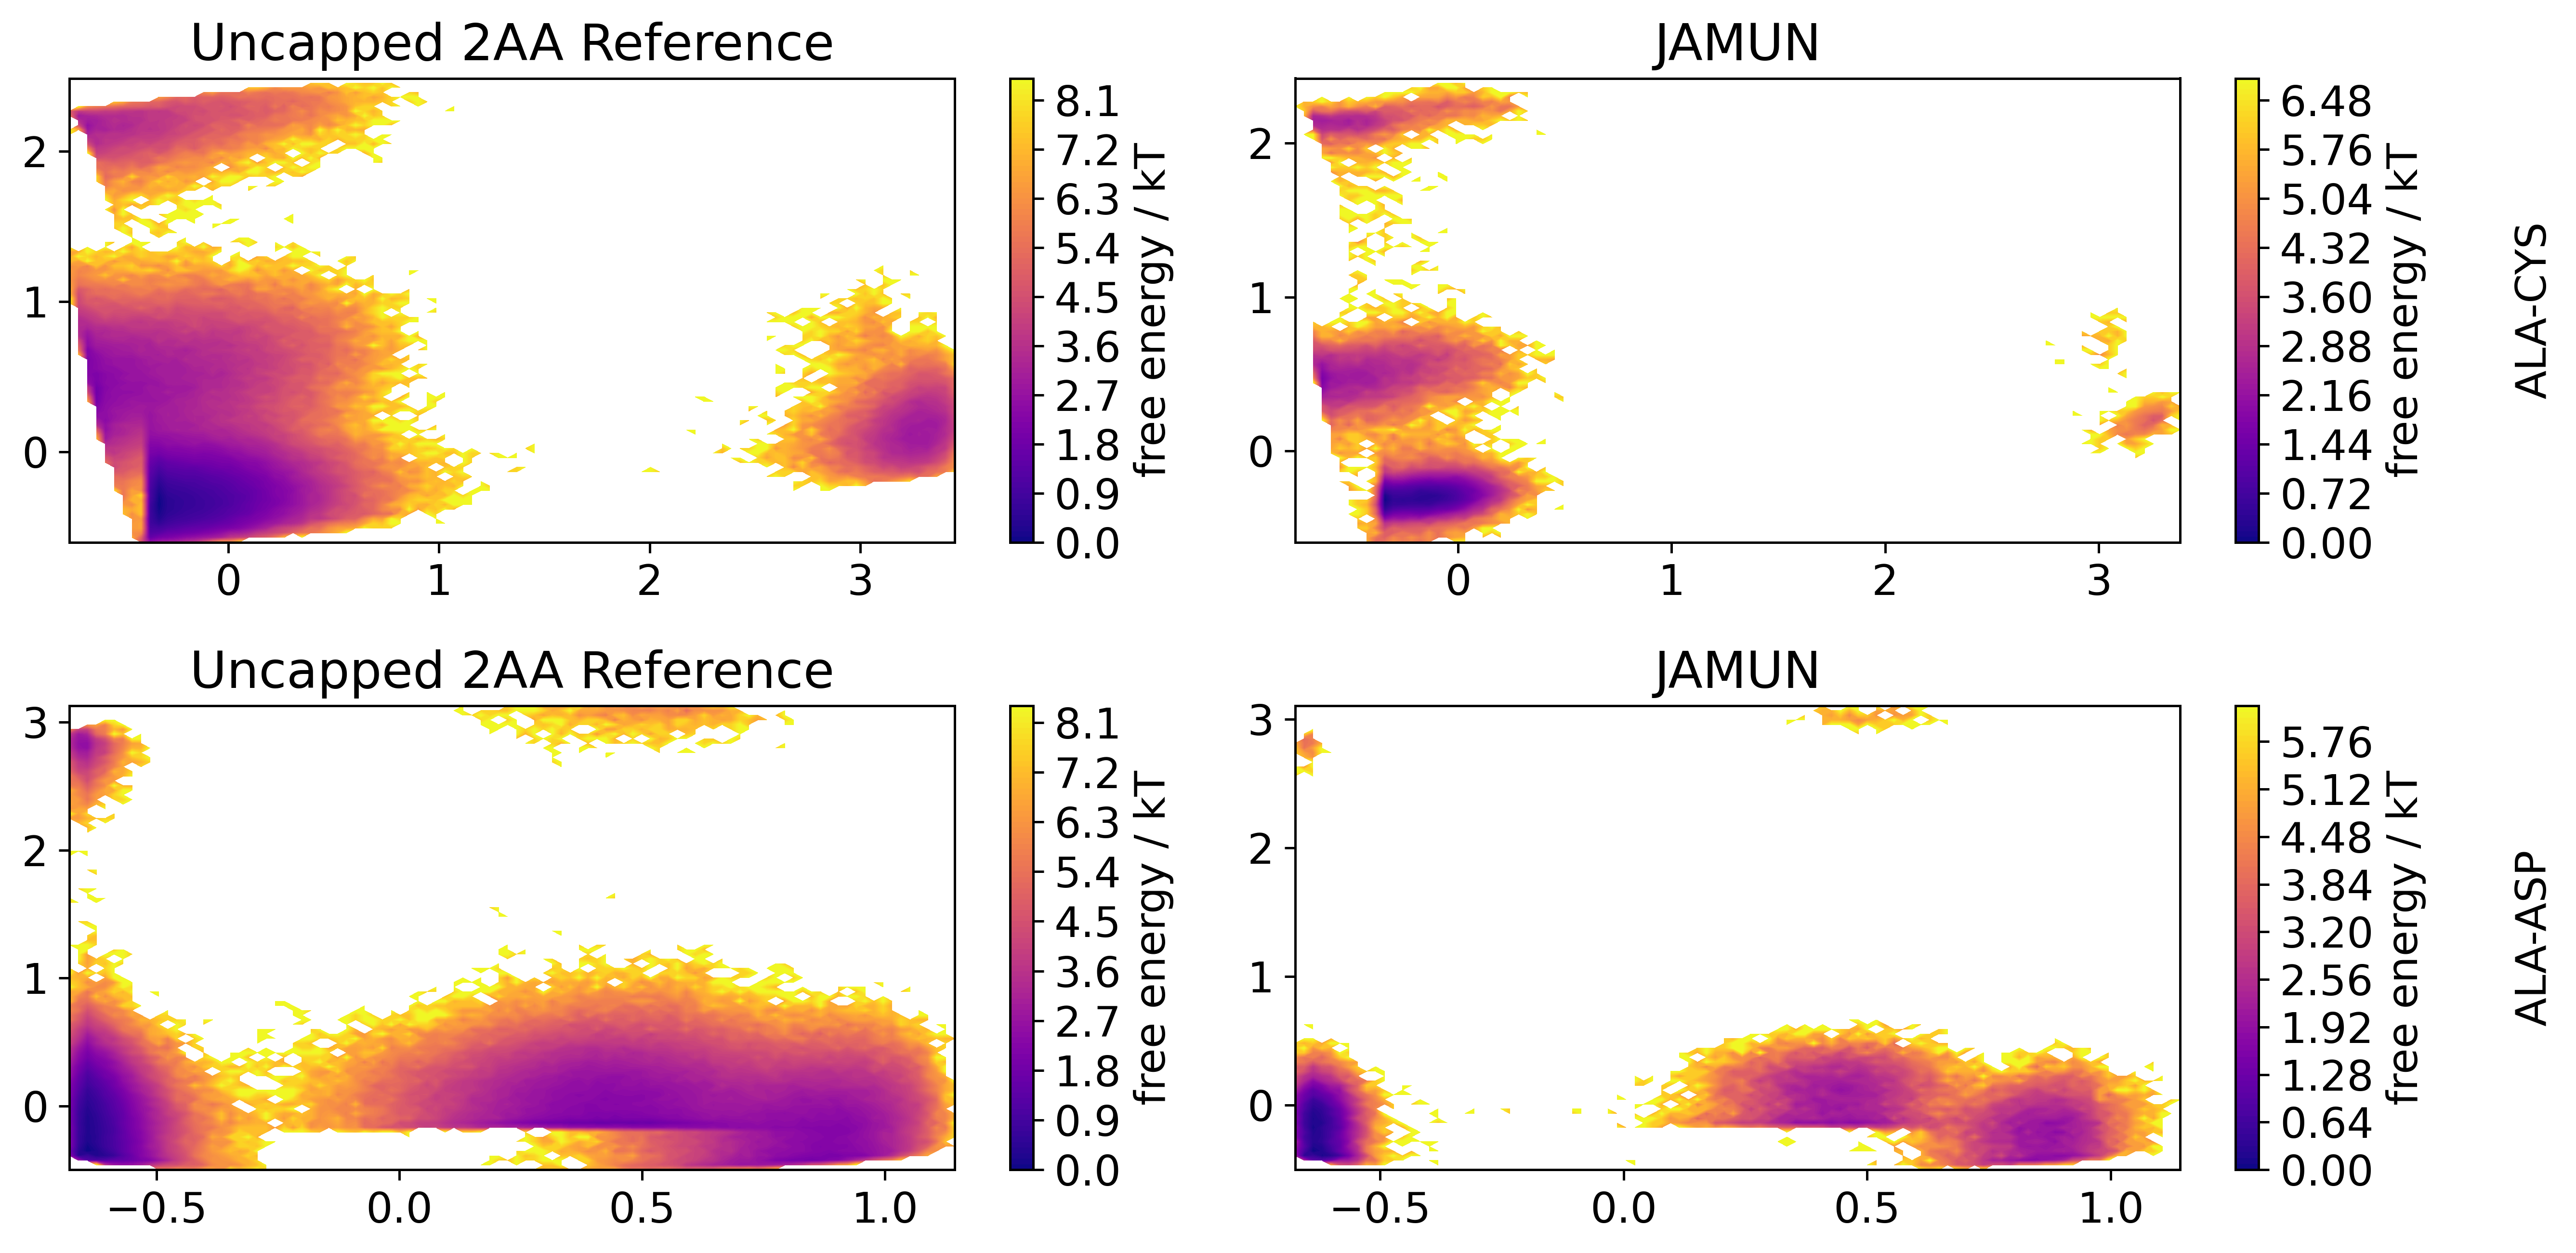

In [13]:
fig, axs = plt.subplots(nrows=len(JAMUN_trajs), ncols=2, figsize=(12, 6), squeeze=False)

for i, peptide in enumerate(JAMUN_trajs):
    Timewarp_feat, Timewarp_featurized_traj = get_featurized_trajectory(Timewarp_trajs[peptide], cossin=True)
    JAMUN_feat, JAMUN_featurized_traj = get_featurized_trajectory(JAMUN_trajs[peptide], cossin=True)
    
    tica = pyemma.coordinates.tica(Timewarp_featurized_traj, lag=1000, kinetic_map=True)
    Timewarp_tica = tica.transform(Timewarp_featurized_traj)
    JAMUN_tica = tica.transform(JAMUN_featurized_traj)

    pyemma.plots.plot_free_energy(Timewarp_tica[:,0], Timewarp_tica[:,1], cmap="plasma", ax=axs[i, 0])
    axs[i, 0].set_title("Uncapped 2AA Reference")

    pyemma.plots.plot_free_energy(JAMUN_tica[:,0], JAMUN_tica[:,1], cmap="plasma", ax=axs[i, 1])
    axs[i, 1].set_title("JAMUN")

    peptide_3letter = "-".join([convert_to_three_letter_code(aa) for aa in peptide])
    axs[i, -1].text(1.4, 0.5, peptide_3letter, rotation=90, verticalalignment='center', horizontalalignment='center', transform=axs[i, -1].transAxes)

plt.tight_layout()

In [14]:
def plot_ramachandran_contour(traj: md.Trajectory, dihedral_index: int, ax: Optional[plt.Axes] = None) -> plt.Axes:
    """Plots the Ramachandran contour plot of a trajectory."""

    if ax is None:
        _, ax = plt.subplots(figsize=(10,10))
    
    _, phi = md.compute_phi(traj)
    _, psi = md.compute_psi(traj)
    H, xedges, yedges = np.histogram2d(phi.T[dihedral_index], psi.T[dihedral_index], bins=np.linspace(-np.pi,np.pi,50))
    pmf = -np.log(H.T)+np.max(np.log(H.T))

    im = ax.contourf(xedges[:-1], yedges[:-1], pmf, cmap='viridis', levels=50)
    contour = ax.contour(xedges[:-1], yedges[:-1], pmf, colors='white', linestyles='solid', levels=30, linewidths=0.25)

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel("$\phi$")
    ax.set_ylabel("$\psi$")
    
    tick_eps = 0.1
    ticks = [-np.pi + tick_eps, -np.pi/2, 0, np.pi/2, np.pi - tick_eps]
    tick_labels = ["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]
    ax.set_xticks(ticks, tick_labels)
    ax.set_yticks(ticks, tick_labels)
    
    return ax

n_dihedrals 1
label_offset 0.5


/tmp/ipykernel_708191/847990099.py:10: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(H.T)+np.max(np.log(H.T))
/tmp/ipykernel_708191/847990099.py:10: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(H.T)+np.max(np.log(H.T))
/tmp/ipykernel_708191/847990099.py:10: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(H.T)+np.max(np.log(H.T))
/tmp/ipykernel_708191/847990099.py:10: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(H.T)+np.max(np.log(H.T))


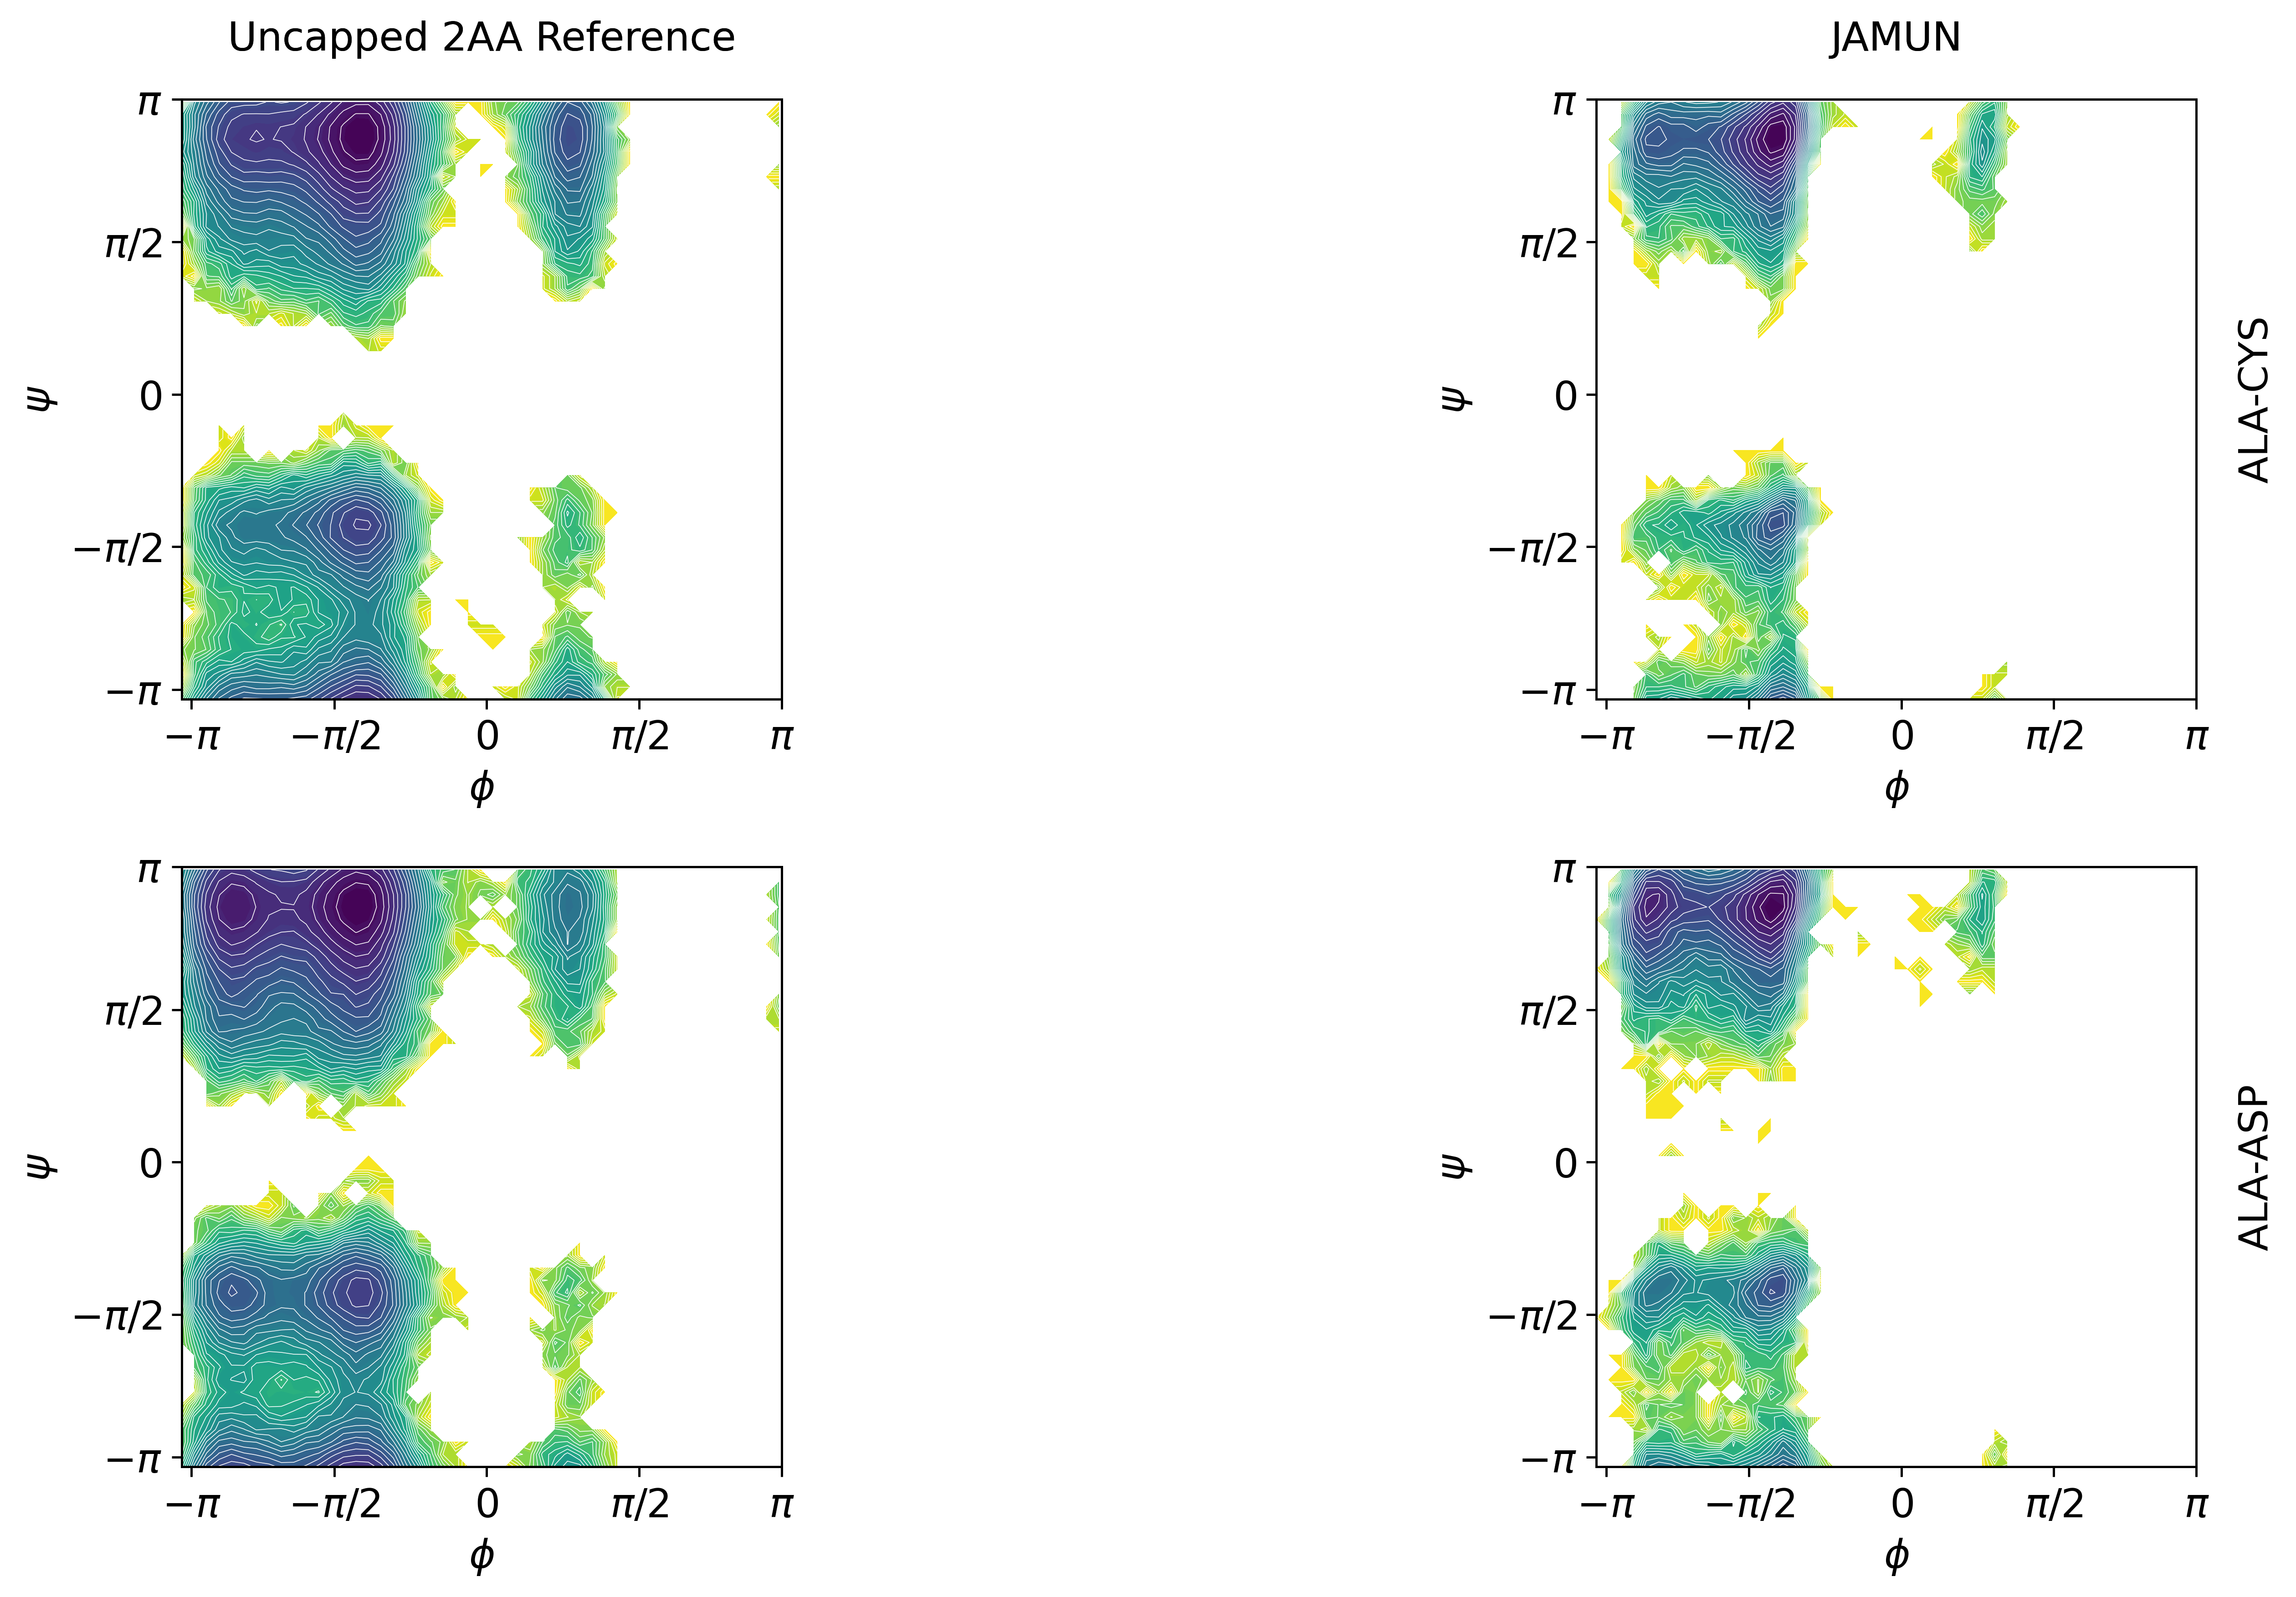

In [15]:
n_dihedrals = num_dihedrals(next(iter(JAMUN_trajs.values())))
print("n_dihedrals", n_dihedrals)
if n_dihedrals % 2 == 0:
    label_offset = 1.0
else:
    label_offset = 0.5
print("label_offset", label_offset)


fig, axs = plt.subplots(len(JAMUN_trajs), 2 * n_dihedrals, figsize=(16, 8), squeeze=False)
for i, peptide in enumerate(JAMUN_trajs):
    for j in range(n_dihedrals):
        plot_ramachandran_contour(Timewarp_trajs[peptide], j, axs[i, j])
        plot_ramachandran_contour(JAMUN_trajs[peptide], j, axs[i, j + n_dihedrals])

    # Add labels.
    axs[0, n_dihedrals // 2].text(label_offset, 1.1, "Uncapped 2AA Reference", horizontalalignment='center', verticalalignment='center', transform=axs[0, n_dihedrals // 2].transAxes)
    axs[0, n_dihedrals // 2 + n_dihedrals].text(label_offset, 1.1, "JAMUN", horizontalalignment='center', verticalalignment='center', transform=axs[0, n_dihedrals // 2 + n_dihedrals].transAxes)
    
    peptide_3letter = "-".join([convert_to_three_letter_code(aa) for aa in peptide])
    axs[i, -1].text(1.1, 0.5, peptide_3letter, rotation=90, verticalalignment='center', horizontalalignment='center', transform=axs[i, -1].transAxes)

plt.tight_layout()
plt.show()

In [16]:
def compute_JS_divergence_vs_time(traj: md.Trajectory, reference_traj: md.Trajectory, num_steps: int) -> np.ndarray:
    """Computes the JS divergence between the Ramachandran distributions of a trajectory and a reference trajectory at different time points."""
    steps = np.linspace(0, len(traj), (num_steps + 1)).astype(int)[1:]

    js_divs = [
        compute_JS_divergence_of_ramachandran(
            traj[:step],
            reference_traj,
        )
        for step in steps
    ]
    return np.array(js_divs)

def compute_JS_divergences_vs_time(trajs: Dict[str, md.Trajectory], reference_trajs: Dict[str, md.Trajectory], num_steps: int) -> Dict[str, np.ndarray]:
    """Computes the JS divergence between the Ramachandran distributions of a set of trajectories and a reference trajectory at different time points."""
    return {peptide: compute_JS_divergence_vs_time(trajs[peptide], reference_trajs[peptide], num_steps) for peptide in trajs}


In [17]:
num_steps = 10
JAMUN_js_divs = compute_JS_divergences_vs_time(JAMUN_trajs, Timewarp_trajs, num_steps)
Timewarp_js_divs = compute_JS_divergences_vs_time(Timewarp_trajs, Timewarp_trajs, num_steps)

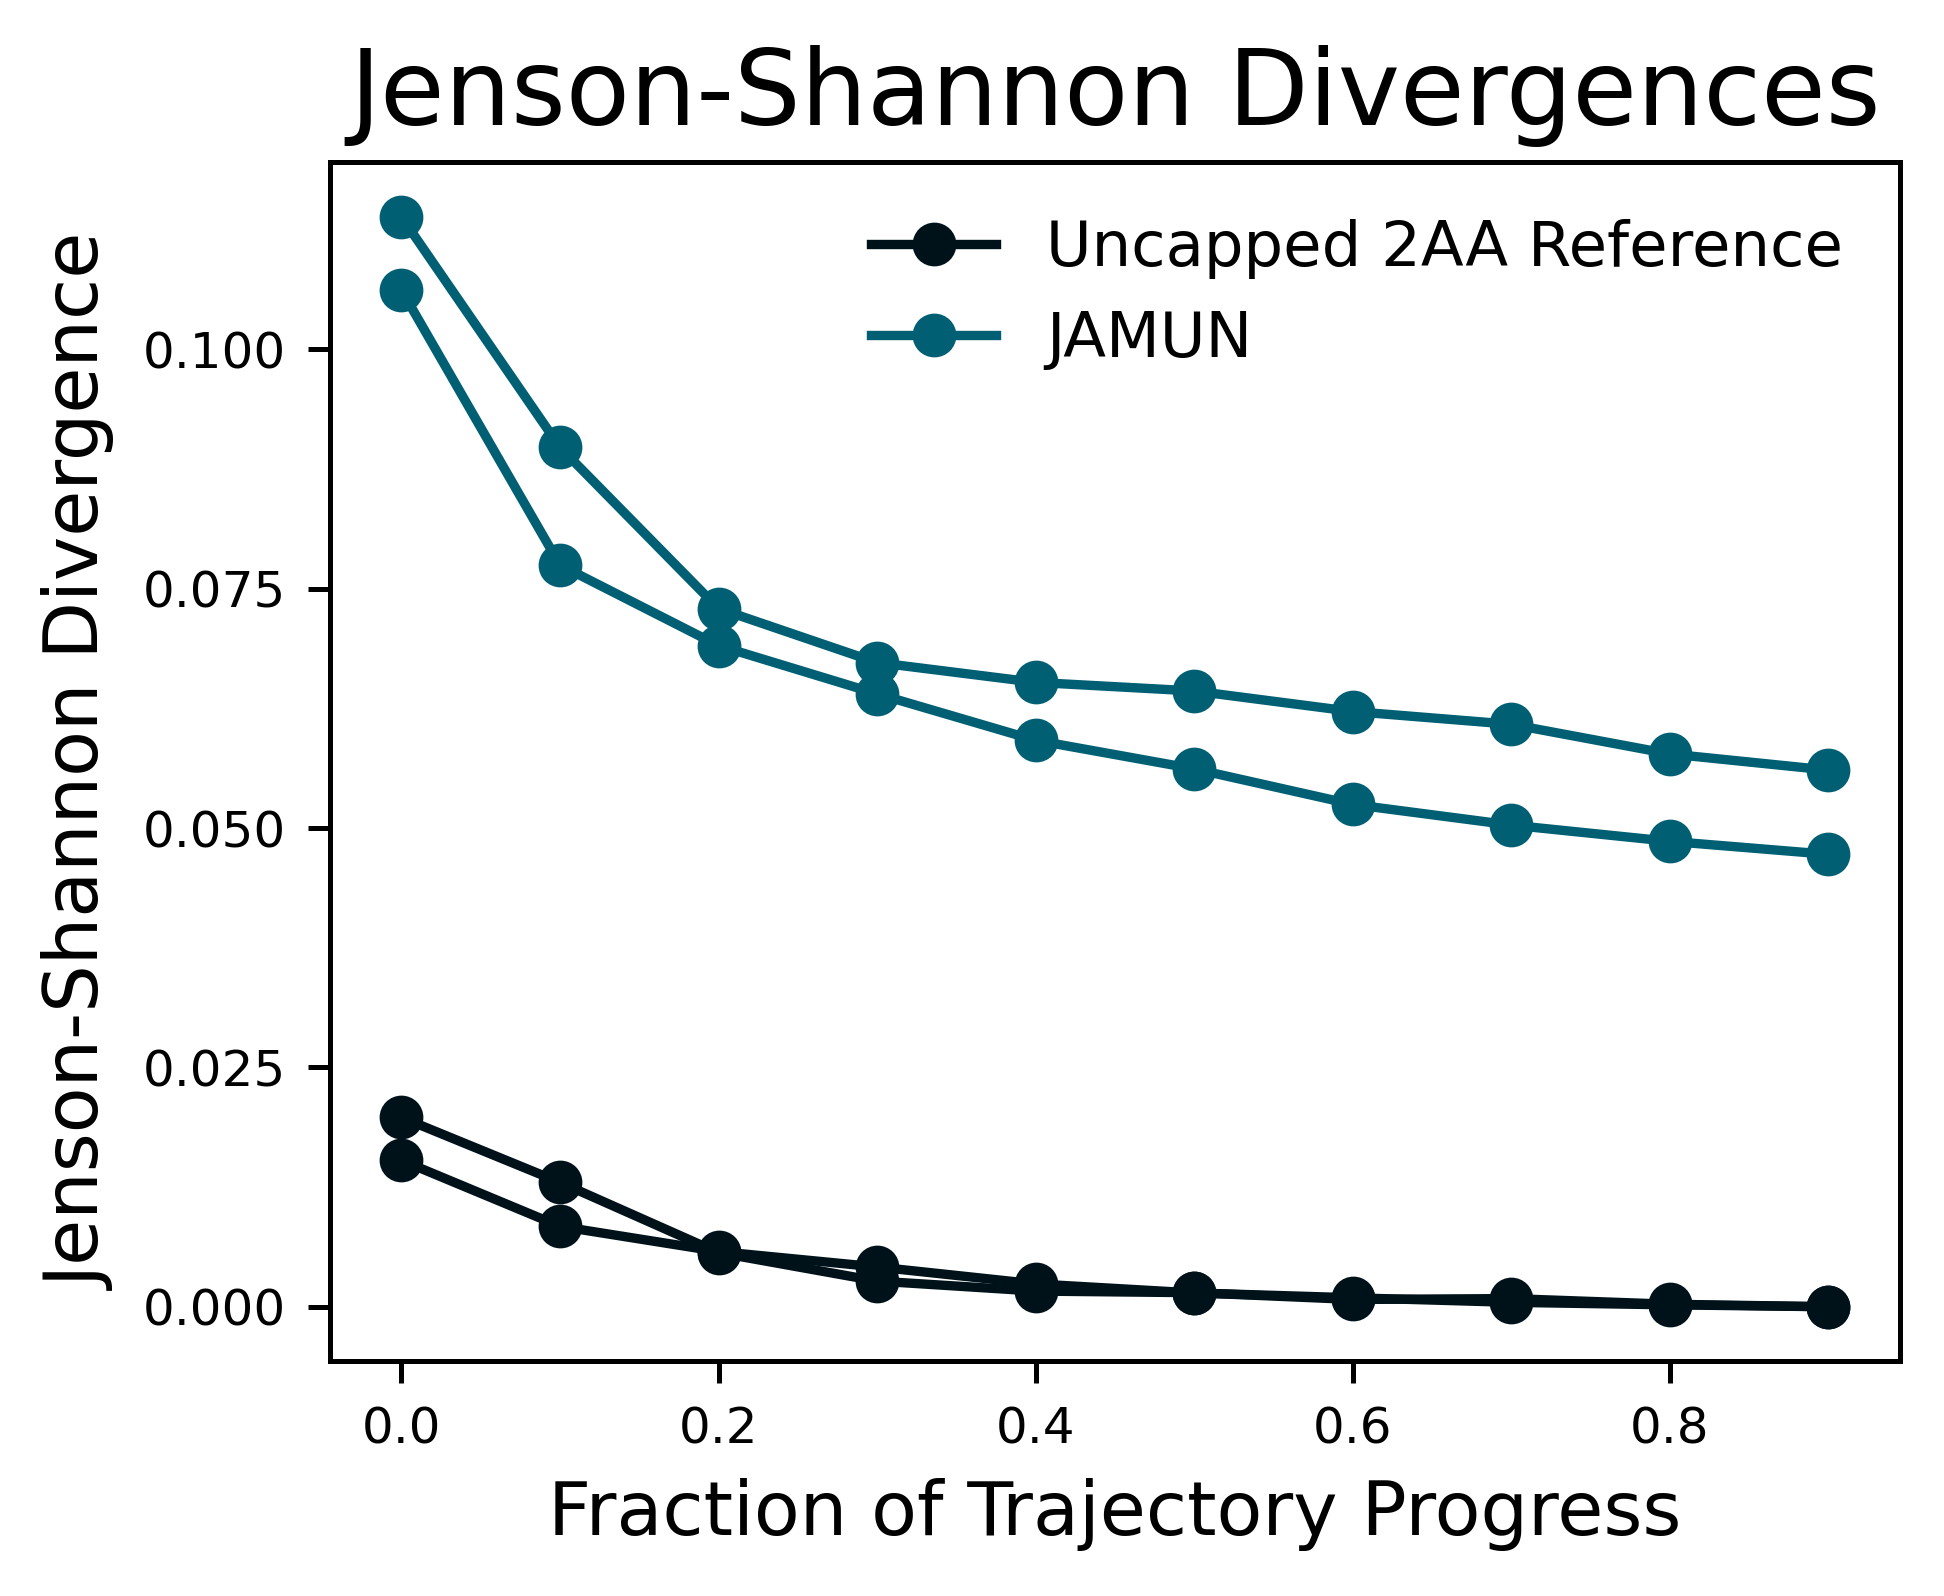

In [18]:
for index, peptide in enumerate(JAMUN_js_divs):
    if index == 0:
        Timewarp_label = None
        JAMUN_label = None
    else:
        Timewarp_label = "Uncapped 2AA Reference"
        JAMUN_label = "JAMUN"

    progress = np.arange(num_steps) / num_steps
    plt.plot(progress, Timewarp_js_divs[peptide], color='C0', label=Timewarp_label)
    plt.plot(progress, JAMUN_js_divs[peptide], color='C1', label=JAMUN_label)

plt.title("Jenson-Shannon Divergences")
plt.xlabel("Fraction of Trajectory Progress", fontsize=12)
plt.ylabel("Jenson-Shannon Divergence", fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()